In [1]:
!pip install  swig
!pip install  gymnasium[box2d]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373070 sha256=d2071929e1698dbbe1d0445117cfc2dc7c604a3e20f11ecc1bf5241161f12387
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


GIF saved as lunarlander.gif


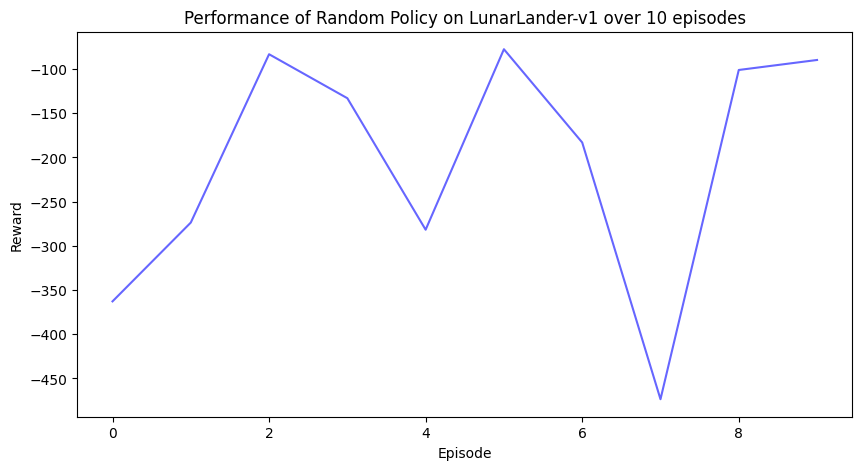

In [1]:
import gymnasium as gym
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import imageio
import matplotlib.pyplot as plt

# Initialize the LunarLander environment
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind= False,
    wind_power = 15.0,
    turbulence_power = 1.5,
    render_mode = "rgb_array"
)

def render_to_image(env):
    """Convert the text-based rendering to an image."""
    img = env.render()
    return img

def evaluate_and_save_gif(num_episodes=100, filename="lunarlander.gif"):
    """
    Evaluate a random policy, save the rendered outputs to a GIF, and return aggregated rewards.
    """
    frames = []
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False

        # Add initial state to frames
        frames.append(render_to_image(env))

        while not done:
            # Choose a random action
            action = env.action_space.sample()

            # Take a step in the environment
            next_state, reward, done, _, info = env.step(action)
            episode_reward += reward

            # Add the new state to frames
            frames.append(render_to_image(env))

        rewards.append(episode_reward)

    # Save frames as a gif
    imageio.mimsave(filename, [np.array(f) for f in frames], duration=0.5)
    print(f"GIF saved as {filename}")

    return rewards

# Evaluate the random policy, save the GIF, and retrieve rewards
num_episodes = 10
rewards = evaluate_and_save_gif(num_episodes=num_episodes, filename="lunarlander.gif")

# Plotting the aggregated rewards
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes), rewards, alpha=0.6, color='blue')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Performance of Random Policy on LunarLander-v1 over {} episodes'.format(num_episodes))
plt.show()
